In [1]:
import tensorflow as tf
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [2]:
import os
import warnings
warnings.filterwarnings(action='ignore')

os.environ['CUDA_VISIBLE_DEVICES']='0'

In [3]:
from glob import glob
import numpy as np
import PIL
from PIL import Image

path = './data/train/'


training_images = []
training_labels = []

for filename in glob(path+'*'): # 파일을 하나씩 filename에 넣음
    for img in glob(filename+'/*.jpg'): # 파일 안에 있는 이미지를 하나씩 읽음
        an_img = PIL.Image.open(img)
        img_array = np.array(an_img)
        training_images.append(img_array)
        label = filename.split('/')[-1] # 파일명을 라벨로
        training_labels.append(label)
        
training_images = np.array(training_images)
training_labels = np.array(training_labels)


In [4]:
training_images, training_labels

(array([[[[ 80, 101, 102],
          [109, 133, 133],
          [106, 131, 128],
          ...,
          [111, 133, 146],
          [111, 133, 147],
          [ 65,  88, 102]],
 
         [[140, 160, 161],
          [178, 199, 200],
          [182, 207, 204],
          ...,
          [185, 205, 216],
          [175, 197, 208],
          [123, 147, 157]],
 
         [[138, 156, 156],
          [177, 195, 195],
          [186, 206, 205],
          ...,
          [194, 213, 219],
          [177, 198, 203],
          [116, 140, 144]],
 
         ...,
 
         [[ 36,  48,  44],
          [ 46,  58,  54],
          [ 50,  61,  55],
          ...,
          [ 47,  56,  51],
          [105, 116, 108],
          [ 81,  93,  83]],
 
         [[ 44,  56,  52],
          [ 58,  70,  66],
          [ 57,  68,  64],
          ...,
          [ 74,  86,  76],
          [120, 131, 117],
          [ 82,  93,  77]],
 
         [[ 48,  60,  56],
          [ 56,  68,  64],
          [ 45,  56,  52],
   

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_labels = le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1,1)

In [6]:
print(training_images.shape)
print(training_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [7]:

path = './data/test/'


test_images = []
test_idx = []

for img in sorted(glob(path+'/*.jpg')): # 파일 안에 있는 이미지를 하나씩 읽음
    an_img = PIL.Image.open(img)
    img_array = np.array(an_img)
    test_images.append(img_array)
    label = img.split('/')[-1]
    test_idx.append(label)

test_images = np.array(test_images)

print(test_images.shape)
print(test_idx[0:5])

(10000, 32, 32, 3)
['0000.jpg', '0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg']


In [8]:
len(training_images[1])

32

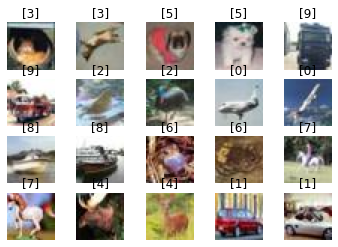

In [9]:
import matplotlib.pyplot as plt


for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(training_images[i*2500])
    plt.axis('off')
    plt.title(training_labels[i*2500])

In [10]:
label_num = [0,1,2,3,4,5,6,7,8,9]
label_name = le.inverse_transform(label_num)

for i in range(10):
    print(label_num[i],label_name[i])

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_genertor = ImageDataGenerator(
    rotation_range=30, # 이미지를 랜덤한 각도로 돌리는 정도
    brightness_range=[0.8,1.0], # 이미지의 밝기를 랜덤하게 다르게 주는 정도
    zoom_range=0.3, # 사진을 확대하는 정도
    width_shift_range=0.2, # 사진을 왼쪽 오른쪽으로 움직이는 정도
    height_shift_range=0.2, # 사진을 위 아래로 움직이는 정도
    horizontal_flip=True, # 오른쪽 왼쪽 뒤집기
    vertical_flip=False) # 위 아래 뒤집기

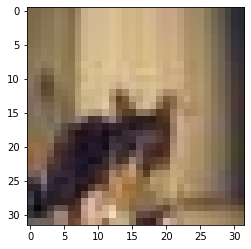

In [12]:
sample_image = training_images[1]
plt.imshow(sample_image.astype('uint8'))
sample_image = np.expand_dims(sample_image,0)

In [13]:
sample_images_it = image_genertor.flow(sample_image,batch_size=1)

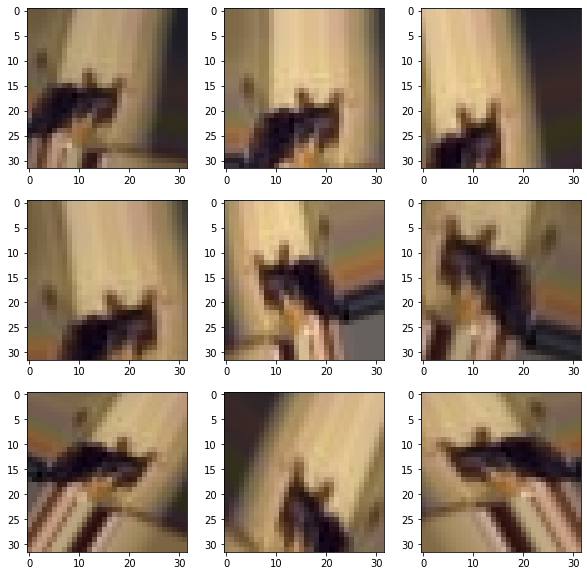

In [14]:
fig = plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    batch = sample_images_it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [15]:
augment_size = 100000

random_mask = np.random.randint(training_images.shape[0],size=augment_size)
training_images_aug = training_images[random_mask].copy()
training_labels_aug = training_labels[random_mask].copy()

In [16]:
training_images_aug = image_genertor.flow(training_images_aug,np.zeros(augment_size),batch_size=augment_size,
                                         shuffle=False).next()[0]
training_images = np.concatenate((training_images,training_images_aug))
training_labels = np.concatenate((training_labels,training_labels_aug))

In [17]:
# 데이터 셋 나누기

from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(training_images,training_labels,
                                                     test_size=0.1,random_state=42,stratify=training_labels)

X_test = test_images

In [18]:
print('X_train 크기:',X_train.shape)
print('y_train 크기:',y_train.shape)
print('X_valid 크기:',X_valid.shape)
print('y_valid 크기:',y_valid.shape)
print('X_test  크기:',X_test.shape)

X_train 크기: (135000, 32, 32, 3)
y_train 크기: (135000, 1)
X_valid 크기: (15000, 32, 32, 3)
y_valid 크기: (15000, 1)
X_test  크기: (10000, 32, 32, 3)


In [19]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [20]:
from tensorflow import keras

In [21]:
class InceptionModule(keras.layers.Layer):
    def __init__(self,filter_1x1, reduce_3x3, filter_3x3, reduce_5x5, filter_5x5, pool_proj,**kwargs):
        super().__init__(**kwargs)
        self.conv1x1 = keras.layers.Conv2D(filter_1x1,1,strides=1,padding='same')
        self.reduce3x3 = keras.layers.Conv2D(reduce_3x3,1,strides=1,padding='same')
        self.conv3x3 = keras.layers.Conv2D(filter_3x3,3,strides=1,padding='same')
        self.reduce5x5 = keras.layers.Conv2D(reduce_5x5,1,strides=1,padding='same')
        self.conv5x5 = keras.layers.Conv2D(filter_5x5,5,strides=1,padding='same')
        self.maxpool = keras.layers.MaxPooling2D(3,strides=1,padding='same')
        self.proj = keras.layers.Conv2D(pool_proj,1,strides=1,padding='same')
        self.relu = keras.layers.Activation('relu')
        self.bn_1 = keras.layers.BatchNormalization()
        self.bn_r3 = keras.layers.BatchNormalization()
        self.bn_3 = keras.layers.BatchNormalization()
        self.bn_r5 = keras.layers.BatchNormalization()
        self.bn_5 = keras.layers.BatchNormalization()
        self.bn_pr = keras.layers.BatchNormalization()
    def call(self,inputs):
        conv1 = self.conv1x1(inputs)
        conv1 = self.bn_1(conv1)
        conv1 = self.relu(conv1)
        
        conv3 = self.reduce3x3(inputs)
        conv3 = self.bn_r3(conv3)
        conv3 = self.relu(conv3)
        conv3 = self.conv3x3(conv3)
        conv3 = self.bn_3(conv3)
        conv3 = self.relu(conv3)
        
        conv5 = self.reduce5x5(inputs)
        conv5 = self.bn_r5(conv5)
        conv5 = self.relu(conv5)
        conv5 = self.conv5x5(conv5)
        conv5 = self.bn_5(conv5)
        conv5 = self.relu(conv5)
        
        pool = self.maxpool(inputs)
        pool = self.proj(pool)
        pool = self.bn_pr(pool)
        pool = self.relu(pool)
        
        output = tf.concat([conv1,conv3,conv5,pool],axis=3)
        
        return output

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64,7,activation='relu',strides=2,padding='same',input_shape=[32,32,3],use_bias=False))
model.add(keras.layers.MaxPooling2D(pool_size=3,strides=2,padding='same'))
model.add(keras.layers.Lambda(lambda X : tf.nn.local_response_normalization(X,alpha=0.00002,beta=0.75,bias=1)))
model.add(keras.layers.Conv2D(64,1,strides=1,activation='relu',padding='same',use_bias=False))
model.add(keras.layers.Conv2D(192,3,strides=1,activation='relu',padding='same',use_bias=False))
model.add(keras.layers.Lambda(lambda X : tf.nn.local_response_normalization(X,alpha=0.00002,beta=0.75,bias=1)))
model.add(keras.layers.MaxPooling2D(pool_size=3,strides=2,padding='same'))
model.add(InceptionModule(64,96,128,16,32,32))
model.add(InceptionModule(128,128,192,32,96,64))
model.add(keras.layers.MaxPooling2D(pool_size=3,strides=2,padding='same'))
model.add(InceptionModule(192,96,208,16,48,64))
model.add(InceptionModule(160,112,224,24,64,64))
model.add(InceptionModule(128,128,256,24,64,64))
model.add(InceptionModule(112,144,288,32,64,64))
model.add(InceptionModule(256,160,320,32,128,128))
model.add(keras.layers.MaxPooling2D(pool_size=3,strides=2,padding='same'))
model.add(InceptionModule(256,160,320,32,128,128))
model.add(InceptionModule(384,192,384,48,128,128))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [23]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])

In [24]:
history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=30,batch_size=32)

Epoch 1/30
4219/4219 [==============================] - 633s 144ms/step - loss: 1.7981 - accuracy: 0.3656 - val_loss: 1.9545 - val_accuracy: 0.3066
Epoch 2/30
4219/4219 [==============================] - 1505s 357ms/step - loss: 1.4576 - accuracy: 0.4902 - val_loss: 1.8606 - val_accuracy: 0.4551
Epoch 3/30
4219/4219 [==============================] - 10202s 2s/step - loss: 1.2876 - accuracy: 0.5523 - val_loss: 2.0625 - val_accuracy: 0.3483
Epoch 4/30
4219/4219 [==============================] - 5805s 1s/step - loss: 1.1167 - accuracy: 0.6140 - val_loss: 1.2393 - val_accuracy: 0.6037
Epoch 5/30
4219/4219 [==============================] - 2050s 486ms/step - loss: 1.0201 - accuracy: 0.6482 - val_loss: 1.1377 - val_accuracy: 0.6029
Epoch 6/30
4219/4219 [==============================] - 3933s 932ms/step - loss: 0.9460 - accuracy: 0.6736 - val_loss: 1.0053 - val_accuracy: 0.6525
Epoch 7/30
4219/4219 [==============================] - 6261s 1s/step - loss: 0.8656 - accuracy: 0.7000 - val_lo

In [25]:
model.evaluate(X_valid,y_valid)

469/469 [==============================] - 9s 20ms/step - loss: 1.1902 - accuracy: 0.6974


[1.1901644468307495, 0.6974000334739685]

In [26]:
y_proba = model.predict(X_test)

y_pred = []
for i in y_proba:
    pred = np.argmax(i)
    y_pred.append(pred)
    
y_pred = le.inverse_transform(y_pred)


In [27]:
y_pred

array(['horse', 'automobile', 'airplane', ..., 'deer', 'automobile',
       'frog'], dtype='<U10')

In [28]:
import pandas as pd

sample_submission = pd.read_csv('./data/sample_submission.csv')

sample_submission.target = y_pred
sample_submission.to_csv('./data/sub2.csv',index=False)